# Library imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 100)

# Data loading

In [3]:
columns_dtype = {
    'recommendation_id': 'str',
    'review': 'str',
    'voted_up': 'bool',
    'votes_up': 'int64',
    'votes_funny': 'int64',
    'weighted_vote_score': 'float64',
    'comment_count': 'int64',
    'steam_purchase': 'bool',
    'received_for_free': 'bool',
    'written_during_early_access': 'bool',
    'hidden_in_steam_china': 'bool',
    'steam_china_location': 'str',
    'author_steamid': 'int64',
    'author_num_games_owned': 'int64',
    'author_num_reviews': 'int64',
    'author_playtime_forever': 'int64',
    'author_playtime_last_two_weeks': 'int64',
    'author_playtime_at_review': 'int64',
    'language': 'str',
    'timestamp_created': 'int',
    'timestamp_updated': 'int',
    'author_last_played': 'int'
}

In [4]:
# load the data with the correct data type
collectedData = pd.read_csv("data/reviews.csv", dtype=columns_dtype)
collectedData['timestamp_created'] = pd.to_datetime(collectedData['timestamp_created'], unit='s')
collectedData['timestamp_updated'] = pd.to_datetime(collectedData['timestamp_updated'], unit='s')
collectedData['author_last_played'] = pd.to_datetime(collectedData['author_last_played'], unit='s')

In [5]:
collectedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3151 entries, 0 to 3150
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   recommendation_id               3151 non-null   object        
 1   review                          3147 non-null   object        
 2   timestamp_created               3151 non-null   datetime64[ns]
 3   timestamp_updated               3151 non-null   datetime64[ns]
 4   voted_up                        3151 non-null   bool          
 5   votes_up                        3151 non-null   int64         
 6   votes_funny                     3151 non-null   int64         
 7   weighted_vote_score             3151 non-null   float64       
 8   comment_count                   3151 non-null   int64         
 9   steam_purchase                  3151 non-null   bool          
 10  received_for_free               3151 non-null   bool          
 11  writ

# quick peek

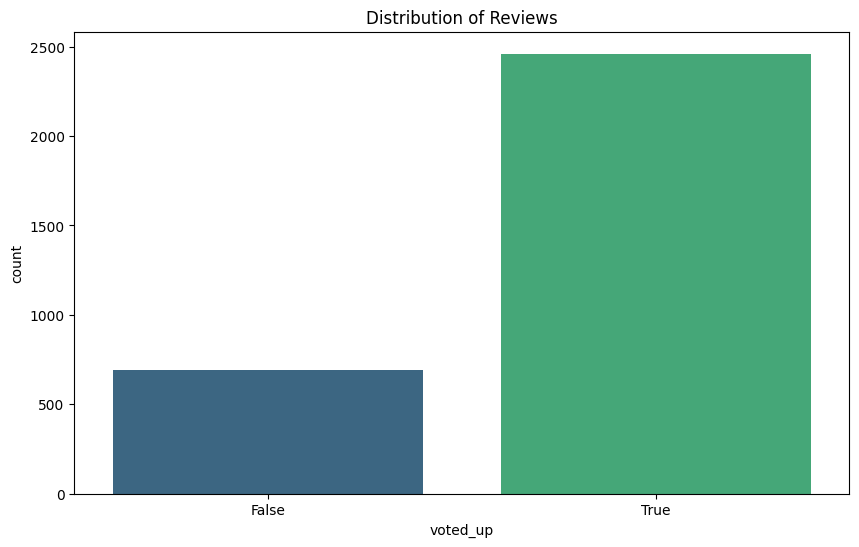

In [6]:
# visualize the distribution of the reviews
plt.figure(figsize=(10, 6))
sns.countplot(data = collectedData, x = 'voted_up', palette = 'viridis', hue = 'voted_up', legend = False)
plt.title("Distribution of Reviews")
plt.show()


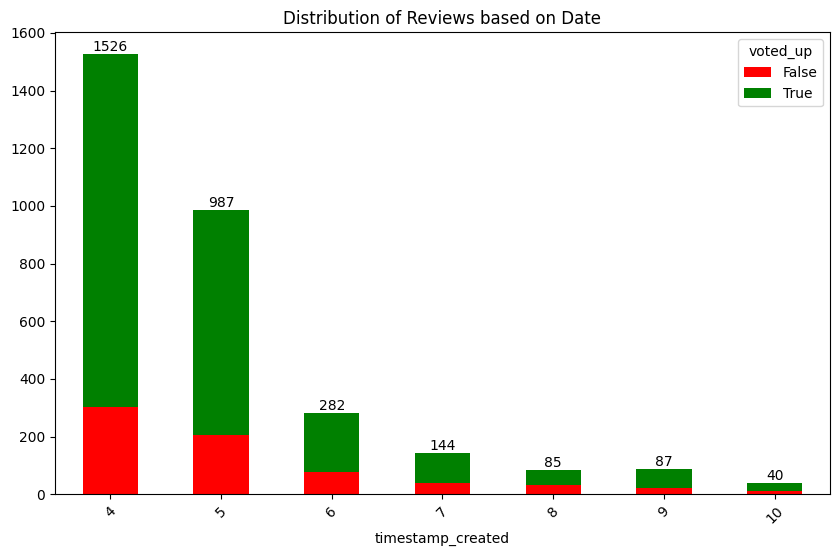

In [8]:
# visualize the distribution of reviews
plt.figure(figsize=(10, 6))

# group the data by date and voted_up
grouped_data = collectedData.groupby([collectedData['timestamp_created'].dt.month, 'voted_up']).size().unstack()
grouped_data.plot(kind='bar', stacked=True, color=['red', 'green'], ax=plt.gca())

for i in range(len(grouped_data)):
    plt.text(i, grouped_data.iloc[i].sum(), grouped_data.iloc[i].sum(), ha='center', va='bottom')
plt.title("Distribution of Reviews based on Date")

plt.xticks(rotation=45)
plt.show()


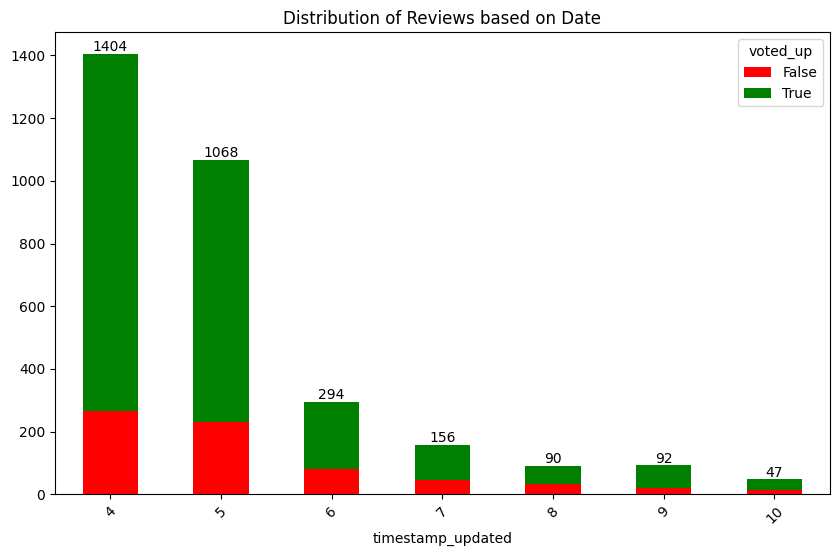

In [9]:
# visualize the distribution of reviews
plt.figure(figsize=(10, 6))

# group the data by date and voted_up
grouped_data = collectedData.groupby([collectedData['timestamp_updated'].dt.month, 'voted_up']).size().unstack()
grouped_data.plot(kind='bar', stacked=True, color=['red', 'green'], ax=plt.gca())
plt.title("Distribution of Reviews based on Date")

for i in range(len(grouped_data)):
    plt.text(i, grouped_data.iloc[i].sum(), grouped_data.iloc[i].sum(), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()


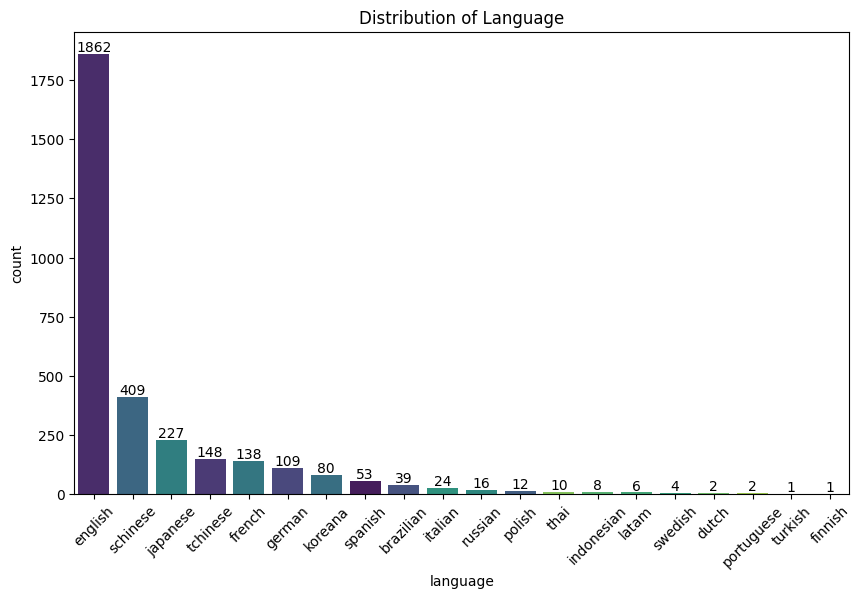

In [10]:
# distribution of the language column
plt.figure(figsize=(10, 6))
sns.countplot(data=collectedData, x='language', palette = 'viridis', hue = 'language', legend = False, order=collectedData['language'].value_counts().index)

plt.title('Distribution of Language')
plt.xticks(rotation=45)

for i in range(len(collectedData['language'].value_counts())):
    count = collectedData['language'].value_counts().values[i]
    plt.text(i, count + 10, count, ha='center')
plt.show()